# Nonlinear Regression

Use a nonlinear regression to esimate the scale in a nonlinear genotype-phenotype map.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from gpmap import GenotypePhenotypeMap
from epistasis.models import EpistasisPowerTransform
from epistasis.pyplot import plot_power_transform

Load data into a GenotypePhenotypeMap.

In [31]:
gpm = GenotypePhenotypeMap.read_json("../data/nonlinear-epistasis-dataset.json")

Create a Power transform and fit.

In [36]:
# Initialize the model
model = EpistasisPowerTransform(lmbda=2, A=1, B=1)
model.add_gpm(gpm)

# Fit the model.
model.fit()

EpistasisPowerTransform(model_type='global')

Plot the nonlinear scale.

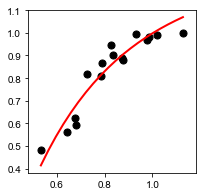

In [37]:
fig, ax = plt.subplots(figsize=(3,3))
plot_power_transform(model, ax=ax)